In [39]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Merge our two data frames together
combined_ride_data = pd.merge(ride_data, city_data, how="left", on="city")
combined_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

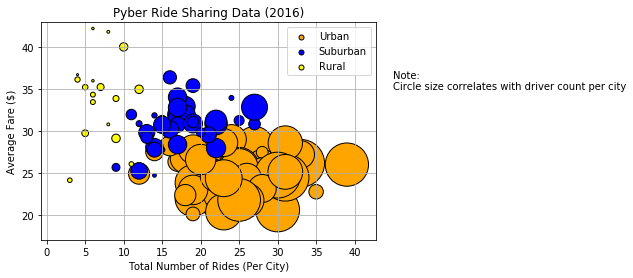

<Figure size 432x288 with 0 Axes>

In [40]:
# Obtain the x and y coordinates for each of the three city types
# x coordinate: Total Number of Rides per City
# y coordinate: Average Fare

rides_per_city = combined_ride_data.groupby(["city", "type"]).count()
rides_per_city.reset_index(level="type", inplace=True)
rides_per_city_urban = rides_per_city.loc[(rides_per_city["type"] == "Urban")]
rides_per_city_suburban = rides_per_city.loc[(rides_per_city["type"] == "Suburban")]
rides_per_city_rural = rides_per_city.loc[(rides_per_city["type"] == "Rural")]

# average_fare = combined_ride_data.groupby(["city", "type"]).mean()["fare"]
average_fare = combined_ride_data.groupby(["city", "type"]).mean()["fare"].reset_index(level="type")
average_fare_urban = average_fare.loc[(average_fare["type"] == "Urban")]
average_fare_suburban = average_fare.loc[(average_fare["type"] == "Suburban")]
average_fare_rural = average_fare.loc[(average_fare["type"] == "Rural")]

driver_count = combined_ride_data.groupby(["city", "type"]).sum()["driver_count"].reset_index(level="type")
driver_count_urban = driver_count.loc[(driver_count["type"] == "Urban")]
driver_count_suburban = driver_count.loc[(driver_count["type"] == "Suburban")]
driver_count_rural = driver_count.loc[(driver_count["type"] == "Rural")]

# Build the scatter plots for each city types
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(-0.75, 43-.25)
plt.ylim(17, 43)
plt.title("Pyber Ride Sharing Data (2016)")

plt.scatter(rides_per_city_urban["ride_id"], average_fare_urban["fare"], s=driver_count_urban["driver_count"],
            color="orange", edgecolors="black", label="Urban")
plt.scatter(rides_per_city_suburban["ride_id"], average_fare_suburban["fare"], s=driver_count_suburban["driver_count"],              
            color="blue", edgecolors="black", label="Suburban")
plt.scatter(rides_per_city_rural["ride_id"], average_fare_rural["fare"], s=driver_count_rural["driver_count"], 
            color="yellow", edgecolors="black", label="Rural")


# add a grid, Legend and Note
plt.grid(True)
lgnd = plt.legend(loc="best")
lgnd.legendHandles[0]._sizes = [25]
lgnd.legendHandles[1]._sizes = [25]
lgnd.legendHandles[2]._sizes = [25]
plt.text(45, 35, "Note:\nCircle size correlates with driver count per city")

# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()
# Save Figure
plt.savefig("pyber_ride_sharing_2016.png")

## Total Fares by City Type

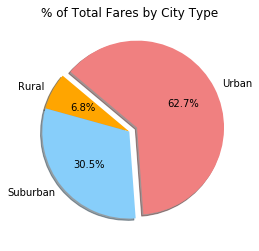

<Figure size 432x288 with 0 Axes>

In [41]:
# Calculate Type Percents
fare_per_city_type = combined_ride_data.groupby(["type"]).sum()["fare"]
total_all_fares = combined_ride_data["fare"].sum()
#
# Build Pie Chart
#
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"] 

# The values (sizes) and colors of each section of the pie chart
sizes = [1, 2, 3]
j = 0
for i in fare_per_city_type:
    sizes[j] = i/total_all_fares
    j += 1
colors = ["orange", "lightskyblue", "lightcoral"]

# Tells matplotlib to separate the "Urban" section from the others
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure
plt.savefig("Percentage_Total_Fares_By_City_Type.png")

## Total Rides by City Type

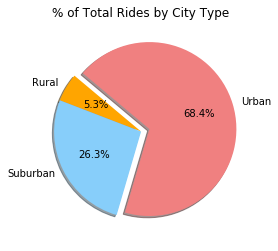

<Figure size 432x288 with 0 Axes>

In [42]:
# Calculate Type Percents
rides_per_city_type = combined_ride_data.groupby(["type"]).count()["ride_id"]
total_all_rides = len(combined_ride_data)

# Build Pie Chart
#
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"] 

# The values (sizes) and colors of each section of the pie chart
sizes = [1, 2, 3]
j = 0
for i in rides_per_city_type:
    sizes[j] = i/total_all_rides
    j += 1
colors = ["orange", "lightskyblue", "lightcoral"]

# Tells matplotlib to separate the "Urban" section from the others
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig("Percentage_Total_Rides_By_City_Type.png")

## Total Drivers by City Type

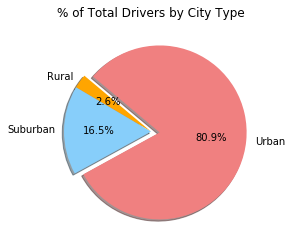

<Figure size 432x288 with 0 Axes>

In [43]:
# Calculate Type Percents
drivers_per_city_type = city_data.groupby(["type"]).sum()["driver_count"]
total_all_drivers = city_data["driver_count"].sum()
#
# Build Pie Chart
#
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"] 

# The values (sizes) and colors of each section of the pie chart
sizes = [1, 2, 3]
j = 0
for i in drivers_per_city_type:
    sizes[j] = i/total_all_drivers
    j += 1
colors = ["orange", "lightskyblue", "lightcoral"]

# Tells matplotlib to separate the "Urban" section from the others
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig("Percentage_Total_Drivers_By_City_Type.png")